# Yahoo Finance

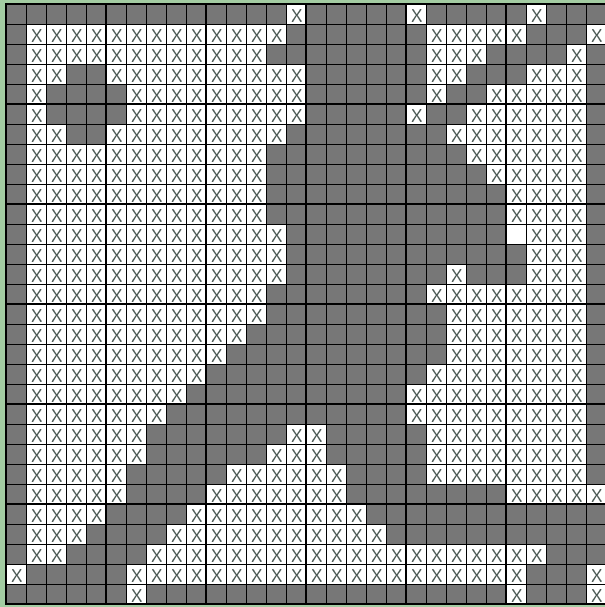

In [1]:
from pandas_datareader import data
import pandas as pd

from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 종목 코드
tickers = ['AAPL']

In [3]:
data_source = 'yahoo'

start_date = datetime(2016,1,1)
end_date = datetime(2020,1,20)

In [4]:
AAPL = data.DataReader(tickers[0], data_source, start_date, end_date)

In [6]:
# Date <- index
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,98.362572
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868


In [7]:
AAPL.index

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17'],
              dtype='datetime64[ns]', name='Date', length=1019, freq=None)

## 주요 미국 시장 Ticker (기업 약자)

AAPL : Apple Inc. 등등 (Yahoo Finance에서 확인 가능)

In [8]:
# 여러 종목을 받을 경우 -> 앞에서 사용한 vars()를 이용하여 
# 각기 ticker 문자열을 변수명으로 사용
# 보통의 경우에는 panel 데이터로 받기도 한다.
tickerList = ['AAPL', 'MS']
for i in range(0, len(tickerList)):
    vars()[tickerList[i]] = data.DataReader(tickerList[i], 
                                            data_source, 
                                            start_date, 
                                            end_date)

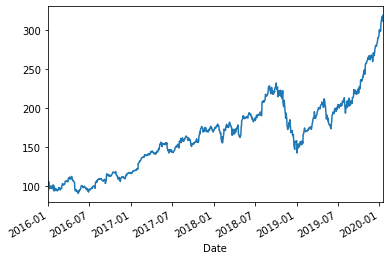

In [9]:
AAPL['Close'].plot()

### 원하는 기간을 대상으로 뽑아올 수 있다.

금융 데이터에서 시계열 데이터를 처리하기 위해 pandas를 고안해냄

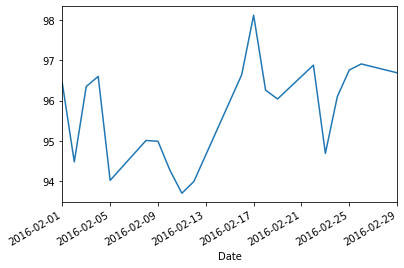

In [10]:
# 한 달 정보
AAPL['2016-02']['Close'].plot()

In [12]:
# 반기 정보
AAPL['2016-01-01':'2016-06-30']
# index가 중간에 빠져도 없는대로 빼고 나머지를 출력해준다. (장점)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
...,...,...,...,...,...,...
2016-06-24,94.660004,92.650002,92.910004,93.400002,75311400.0,88.287621
2016-06-27,93.050003,91.500000,93.000000,92.040001,45489600.0,87.002052
2016-06-28,93.660004,92.139999,92.900002,93.589996,40444900.0,88.467209


In [15]:
# 범위를 알려주는 기준 날짜가 만약에 없으면 에러를 발생 시킨다.
# AAPL['2016-01-01':'2016-06-31']

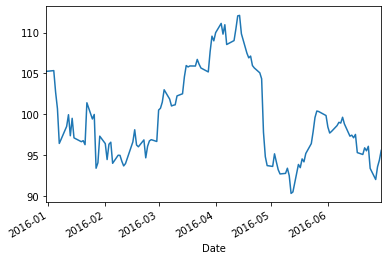

In [17]:
# 상반기
AAPL[:'2016-06-30']['Close'].plot()

## 이동 평균선 (MA)

In [18]:
# 이동평균이 내부 정의되어 있다.
# pandas 버전에 따라서 사용법이 조금씩 다를 수 있다.
AAPL['MA_5'] = AAPL['Close'].rolling(window=5).mean()
AAPL['MA_20'] = AAPL['Close'].rolling(window=20).mean()
AAPL['MA_60'] = AAPL['Close'].rolling(window=60).mean()
AAPL['MA_120'] = AAPL['Close'].rolling(window=120).mean()

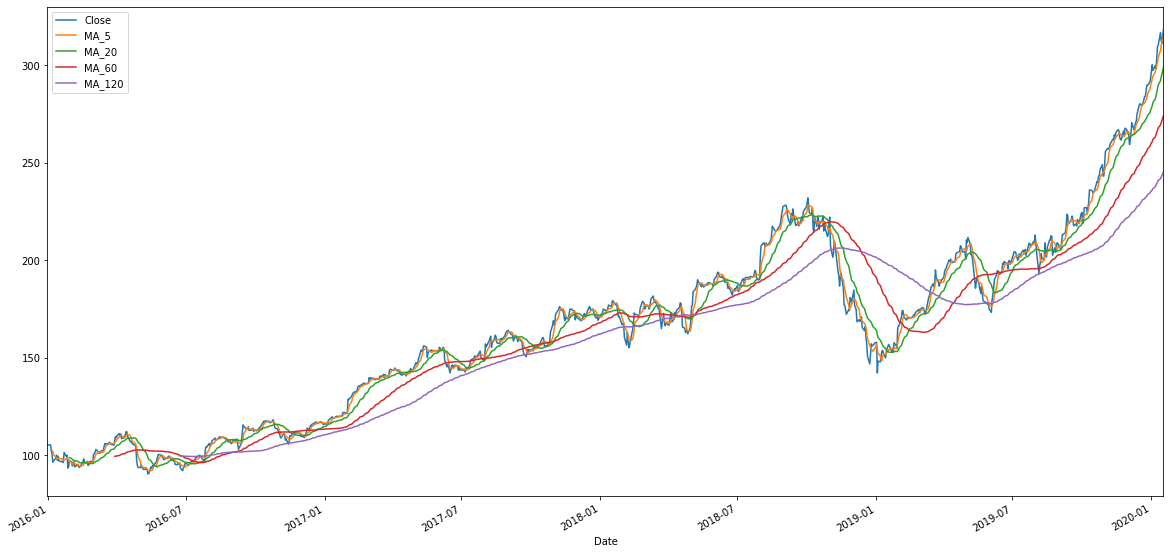

In [22]:
AAPL[['Close','MA_5', 'MA_20', 'MA_60', 'MA_120']].plot(figsize=(20,10))

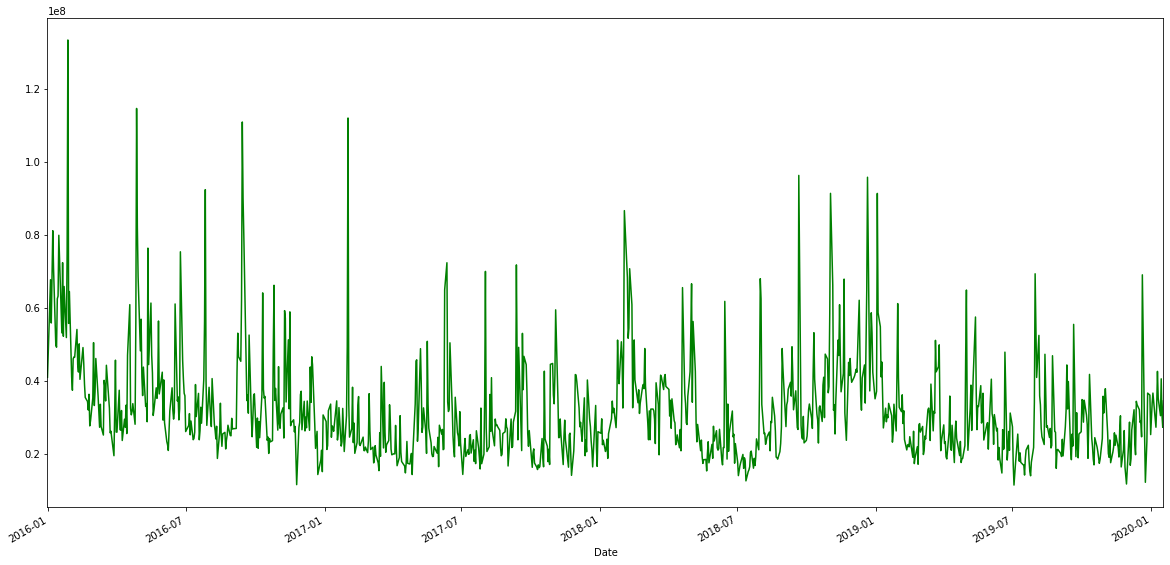

In [24]:
# 거래량 그래프 : 가격과 다른 그래프 색 사용
AAPL['Volume'].plot(figsize=(20,10), style='green')

## Dead Cross, Golden Cross 찾아내기

단기 이동평균선이 장기 이동평균성을 뚫고 올라가는지 내려가는지에 따라 기준

In [31]:
AAPL['dif'] = AAPL['MA_5'] - AAPL['MA_60']
# dif 칼럼에서 한 칸씩 아래로 해서 밀어주는 것
# 하루 전날에 이동평균선 차이가 어땠는지
AAPL['dif_1day_before'] = AAPL['dif'].shift(1) 

- Golden Cross는 dif가 (-) -> (+)  
- Dead Cross는 dif가 (+) -> (-)

In [33]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA_5,MA_20,MA_60,MA_120,dif,dif_1day_before
Date,,,,,,,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,98.362572,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,102.093999,NaN,NaN,NaN,NaN,NaN


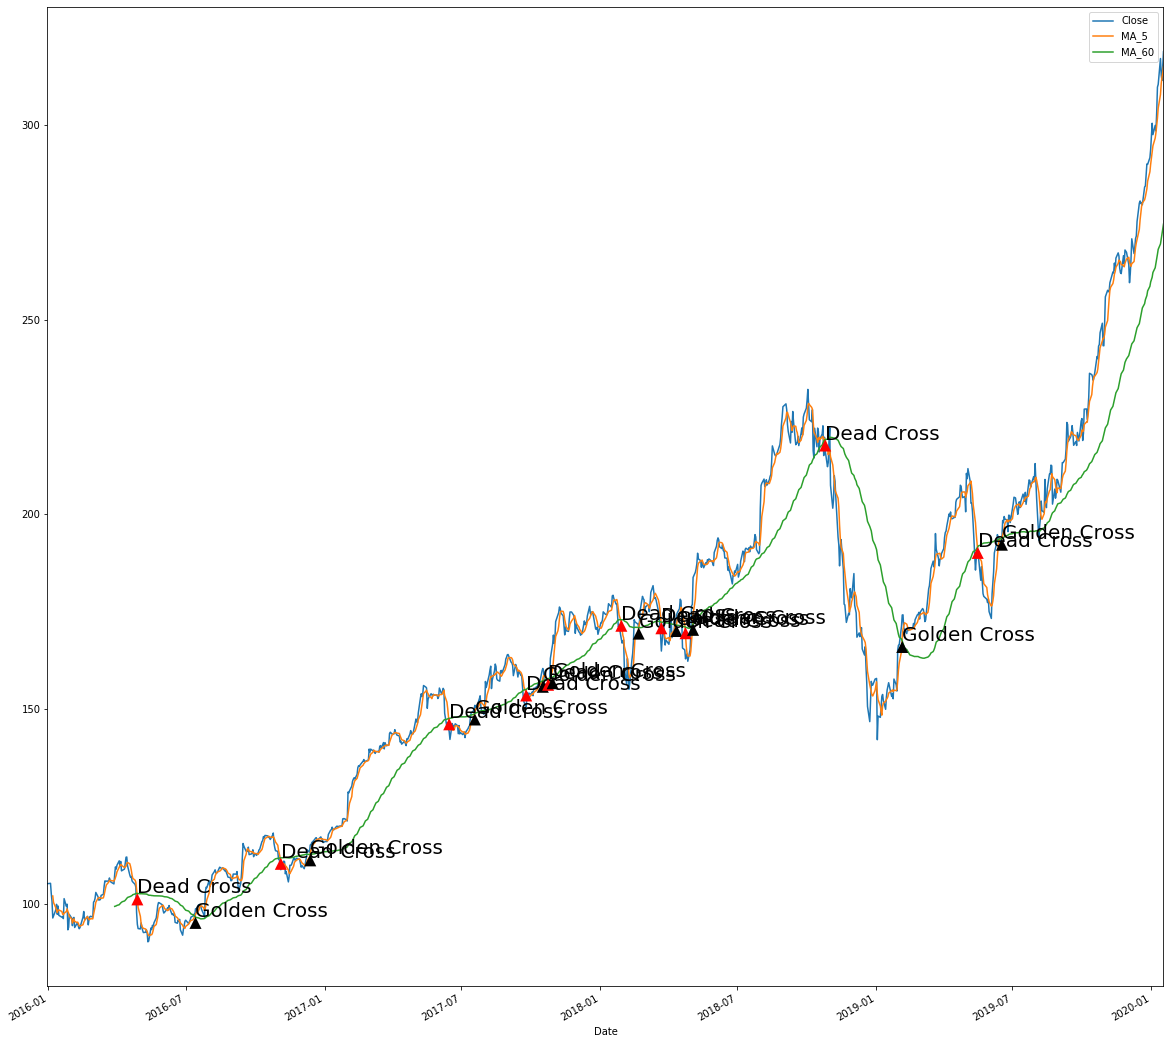

In [57]:
plt1 = AAPL[['Close','MA_5','MA_60']].plot(figsize=(20,20))

# index를 이용하기 위해서 iteritems()
# enumerate와 비슷하게 사용
for index, vals in AAPL['dif'].iteritems():
    # shift(1) 했던 이유는 하나의 index로 다 땡겨오기 위해서
    now_val=AAPL.at[index,'dif']
    pre_val=AAPL.at[index,'dif_1day_before']
    # Golden Cross인 경우 (-) -> (+)
    if(now_val * pre_val <0) & (now_val>0):
        # annotate -> 어떤 것에 대해서 표시하는 것
        plt1.annotate("Golden Cross", 
                      fontsize=20, 
                      xy=(index, AAPL['MA_60'][index]), 
                      arrowprops=dict(facecolor='black', linewidth=0))
    # Dead Cross인 경우 (+) -> (-)
    elif(now_val * pre_val <0) & (now_val<0):
        plt1.annotate("Dead Cross", 
                      fontsize=20, 
                      xy=(index, AAPL['MA_60'][index]), 
                      arrowprops=dict(facecolor='red', linewidth=0))

### subplot2grid 이용해서 각 영역별 크기를 지정해서 그래프 여러개 그리기

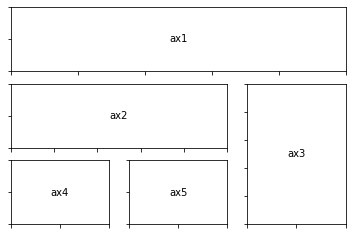

In [46]:
import matplotlib.pyplot as plt


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)

plt.show()

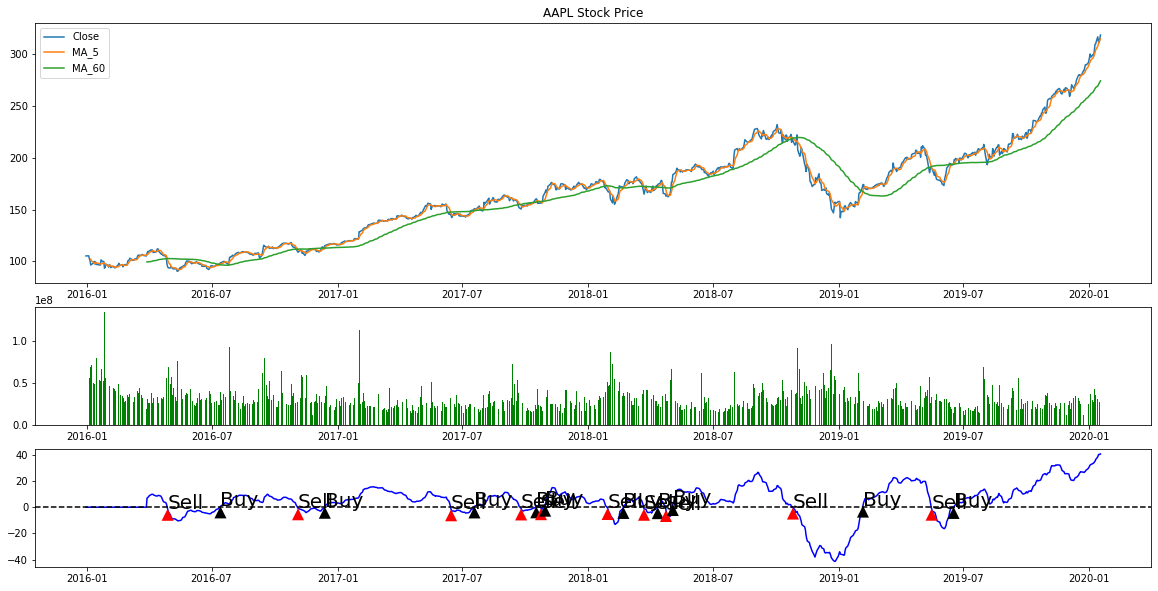

In [58]:
fig = plt.figure(figsize=(20,10))
pricecharplt = plt.subplot2grid((4,1),(0,0), rowspan=2)
pricecharplt.plot(AAPL.index, AAPL['Close'], label='Close')
pricecharplt.plot(AAPL.index, AAPL['MA_5'], label='MA_5')
pricecharplt.plot(AAPL.index, AAPL['MA_60'], label='MA_60')
plt.title('AAPL Stock Price')
plt.legend(loc='best')

volchart = plt.subplot2grid((4,1),(2,0), rowspan=1)
volchart.bar(AAPL.index, AAPL['Volume'], color='green')

sigchart = plt.subplot2grid((4,1),(3,0), rowspan=1)
sigchart.plot(AAPL.index, AAPL['dif'].fillna(0), color='blue')
plt.axhline(y=0,linestyle='--', color='black')

for index, vals in AAPL['dif'].iteritems():
    # shift(1) 했던 이유는 하나의 index로 다 땡겨오기 위해서
    now_val=AAPL.at[index,'dif']
    pre_val=AAPL.at[index,'dif_1day_before']
    # Golden Cross인 경우 (-) -> (+)
    if(now_val * pre_val < 0) & (now_val > 0):
        # annotate -> 어떤 것에 대해서 표시하는 것
        sigchart.annotate("Buy", 
                      fontsize=20, 
                      xy=(index, AAPL['dif'][index]), 
                      arrowprops=dict(facecolor='black', linewidth=0))
    # Dead Cross인 경우 (+) -> (-)
    elif(now_val * pre_val <0) & (now_val<0):
        sigchart.annotate("Sell", 
                      fontsize=20, 
                      xy=(index, AAPL['dif'][index]), 
                      arrowprops=dict(facecolor='red', linewidth=0))

plt.show()